In [240]:
# Load csvs
import pandas as pd
import re as r
import random

# ROCK = pd.read_csv("DataBase/ROCK.csv")
# ROCK["Genre"] = "ROCK" 
# ROCK["id"] = ROCK["id"].str.replace("ROCK","")

# ELECTRONIC = pd.read_csv("DataBase/ELECTRONIC.csv")
# ELECTRONIC["Genre"] = "ELECTRONIC" 
# ELECTRONIC["id"] = ELECTRONIC["id"].str.replace("ELECTRONIC","")

# POP = pd.read_csv("DataBase/POP.csv")
# POP["Genre"] = "POP" 
# POP["id"] = POP["id"].str.replace("POP","")

# RAP = pd.read_csv("DataBase/RAP.csv")
# RAP["Genre"] = "RAP" 
# RAP["id"] = RAP["id"].str.replace("RAP","")

# # Concatenar todos los DataFrame
# SONGS_DB = pd.concat([ROCK, ELECTRONIC, POP, RAP])

# SONGS_DB.drop("Unnamed: 0", axis=1, inplace=True)
# SONGS_DB.drop("id",axis=1,inplace=True)

# SONGS_DB["ID"] = range(1,len(SONGS_DB)+1)

# SONGS_DB["TimesPlayed_Global"] = 0

# SONGS_DB.to_csv("DataBase/SONGS_DB.csv")



#### 


ROCK = pd.read_csv("DataBase/ROCK.csv")
ROCK["Genre"] = "ROCK" 
ROCK["id"] = ROCK["id"].str.replace("ROCK","")

ELECTRONIC = pd.read_csv("DataBase/ELECTRONIC.csv")
ELECTRONIC["Genre"] = "ELECTRONIC" 
ELECTRONIC["id"] = ELECTRONIC["id"].str.replace("ELECTRONIC","")

POP = pd.read_csv("DataBase/POP.csv")
POP["Genre"] = "POP" 
POP["id"] = POP["id"].str.replace("POP","")

RAP = pd.read_csv("DataBase/RAP.csv")
RAP["Genre"] = "RAP" 
RAP["id"] = RAP["id"].str.replace("RAP","")

# Concatenar todos los DataFrame
SONGS_DB = pd.concat([ROCK, ELECTRONIC, POP, RAP])

SONGS_DB.drop("Unnamed: 0", axis=1, inplace=True)
SONGS_DB.drop("id",axis=1,inplace=True)

SONGS_DB["ID"] = range(1,len(SONGS_DB)+1)

In [263]:
SONGS_DB = pd.read_csv("DataBase/SONGS_DB.csv")
SONGS_DB.set_index("ID", inplace=True)

# Drop all Unnameds
Unnamed = [0,0.1,0.2,0.3]

try:
    for i in Unnamed:
        SONGS_DB.drop(f"Unnamed: {i}",axis=1, inplace=True)
except:
    print("Already clean")

Already clean


In [264]:
SONGS_DB.sort_values("TimesPlayed_Global", ascending=False).head(10)

,shortedPath,subgenres,Genre,TimesPlayed_Global
ID,,,,
361,/tracks/RAP/Childish_Gambino/Les.mp3,1,RAP,76
257,/tracks/POP/Ariana_Grande/Side To Side.mp3,2,POP,33
1,/tracks/ROCK/Metallica/Metallica_ Nothing Else...,2,ROCK,32
396,/tracks/RAP/Kendrick_Lamar/Kendrick Lamar - Mo...,4,RAP,27
90,"/tracks/ELECTRONIC/Alesso/Alesso, Tove Lo - He...",2,ELECTRONIC,22
2,/tracks/ROCK/Metallica/Metallica_ Enter Sandma...,1,ROCK,15
335,/tracks/RAP/DaBaby/DaBaby – NASTY Ft. MEGAN TH...,0,RAP,13
167,/tracks/POP/Demi_Lovato/Cool for the Summer (O...,1,POP,12
400,/tracks/RAP/Frank_Ocean/Frank Ocean - Nights.mp3,1,RAP,11


In [243]:
# currented_played = []
# def recommend_song(path:str, genre:str):
#     currented_played.append(path)
#     randipity = random.randint(0,6)
#     if randipity >= 3:
#         current_genre = SONGS_DB[SONGS_DB["Genre"] == genre]
#         current_subgenre = SONGS_DB[SONGS_DB["shortedPath"]==path]
#         current_subgenre = current_subgenre["subgenres"].unique()[0]
#         recomendation = SONGS_DB[~SONGS_DB["shortedPath"].isin(currented_played)]
#         recommendation = recommendation[recommendation["Genre"]== current_genre and recomendation["subgenres"] == current_subgenre].head(1).shortedPath.unique()[0]

In [244]:
import librosa
import matplotlib.pyplot as plt
currented_played = []

def update_times_played(path:str):
    SONGS_DB.loc[SONGS_DB["shortedPath"]==path, "TimesPlayed_Global"] += 1
    SONGS_DB.to_csv("DataBase/SONGS_DB.csv")

def graphic_spectogram(path1:str, path2:str):
    path1 = f"Playlist/{path1}"
    title1 = r.split("/",path1)[-1]
    path2 = f"Playlist/{path2}"
    title2 = r.split("/",path2)[-1]
    audio, sr = librosa.load(path1, sr=None)
    D1 = librosa.amplitude_to_db(abs(librosa.stft(audio))) #Spectogram
    audio, sr = librosa.load(path2, sr=None)
    D2 = librosa.amplitude_to_db(abs(librosa.stft(audio))) #Spectogram

    # Graphic both spectograms
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax[0].imshow(D1, aspect='auto', origin='lower')
    ax[0].set_title(title1)
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Frequency")
    ax[1].imshow(D2, aspect='auto', origin='lower')
    ax[1].set_title(title2)
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("Frequency")
    plt.show()


def recommend_song(path:str, genre:str):
    currented_played.append(path)
    randipity = random.randint(0,6)
    update_times_played(path)
    if randipity >=3:
        current_genre = SONGS_DB[SONGS_DB["Genre"]==genre].head(1).Genre.unique()[0]
        recommendation = SONGS_DB[~SONGS_DB["shortedPath"].isin(currented_played)]
        recommendation = recommendation[recommendation["Genre"]== current_genre].sort_values("TimesPlayed_Global",ascending=False).head(1).shortedPath.unique()[0]
    else:
        current_genre = SONGS_DB[SONGS_DB["Genre"]!=genre].Genre.unique()[random.randint(0,2)]
        recommendation = SONGS_DB[~SONGS_DB["shortedPath"].isin(currented_played)]
        recommendation = recommendation[recommendation["Genre"]== current_genre].sort_values("TimesPlayed_Global",ascending=False).head(1).shortedPath.unique()[0]
    
    currented_played.append(recommendation)
    update_times_played(recommendation)
    graphic_spectogram(path, recommendation)
    recommendation = recommendation.split("/")
    
    return {"genre":recommendation[2], "artist":recommendation[3], "title":recommendation[4]}


def recommend_10_songs(path:str, genre:str):
    recommendation_list = [] # List of recommendations (jsons)
    for i in range(10):
        currented_played.append(path)
        randipity = random.randint(0,6)
        update_times_played(path)
        if randipity >=3:
            current_genre = SONGS_DB[SONGS_DB["Genre"]==genre].head(1).Genre.unique()[0]
            recommendation = SONGS_DB[~SONGS_DB["shortedPath"].isin(currented_played)]
            recommendation = recommendation[recommendation["Genre"]== current_genre].sort_values("TimesPlayed_Global",ascending=False).head(1).shortedPath.unique()[0]
        else:
            current_genre = SONGS_DB[SONGS_DB["Genre"]!=genre].Genre.unique()[random.randint(0,2)]
            recommendation = SONGS_DB[~SONGS_DB["shortedPath"].isin(currented_played)]
            recommendation = recommendation[recommendation["Genre"]== current_genre].sort_values("TimesPlayed_Global",ascending=False).head(1).shortedPath.unique()[0]
        
        currented_played.append(recommendation)
        update_times_played(recommendation)
        # graphic_spectogram(path, recommendation)
        recommendation = recommendation.split("/")
    
        recommendation_list.append({"genre":recommendation[2], "artist":recommendation[3], "title":recommendation[4]})

    return recommendation_list

    

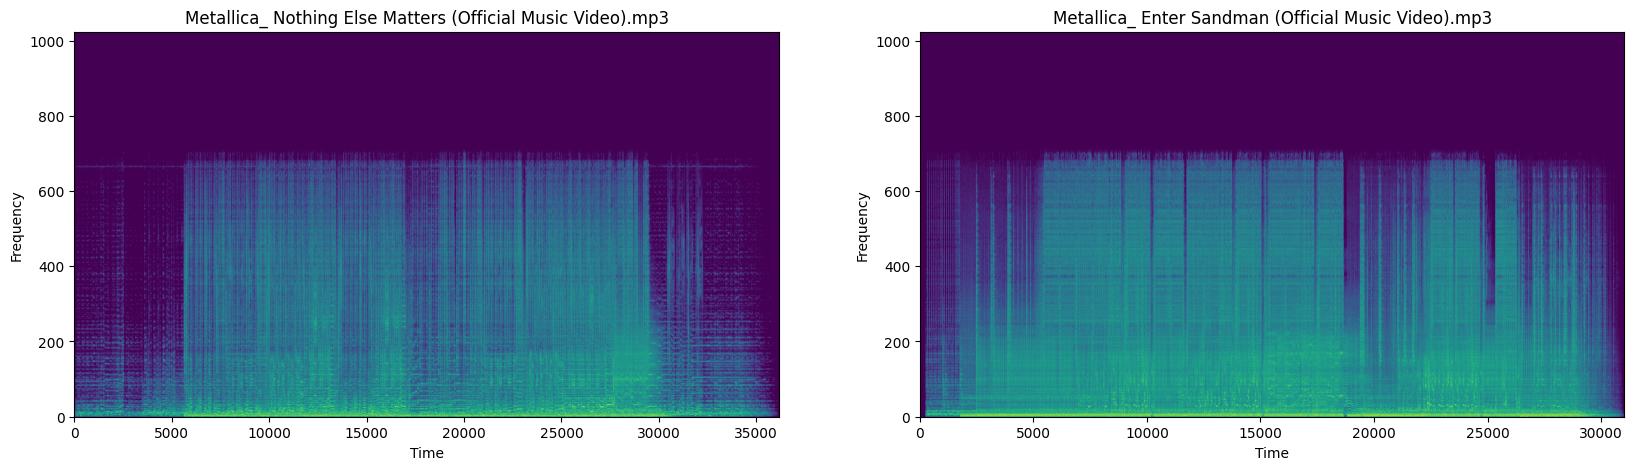

In [245]:
graphic_spectogram(SONGS_DB["shortedPath"].to_list()[0], SONGS_DB["shortedPath"].to_list()[1])

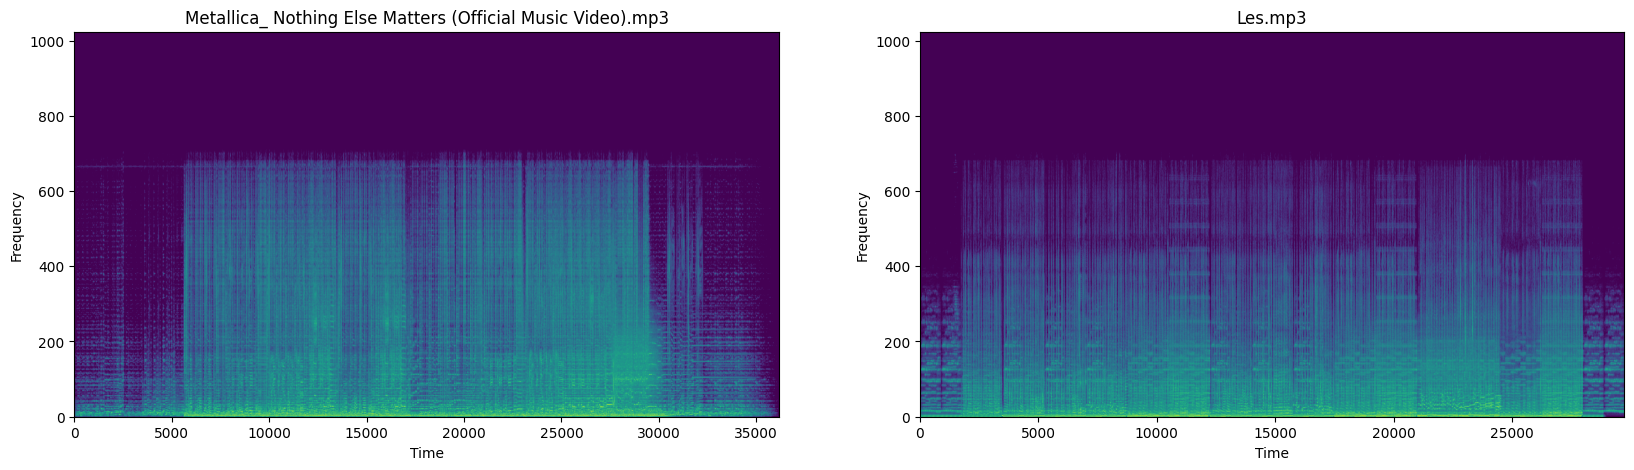

RAP Childish_Gambino Les.mp3


In [246]:
a = recommend_song("/tracks/ROCK/Metallica/Metallica_ Nothing Else Matters (Official Music Video).mp3","ROCK")

genre = a["genre"]
artist = a["artist"]
title = a["title"]

print(genre,artist,title)

In [247]:
b = recommend_10_songs("/tracks/ROCK/Metallica/Metallica_ Nothing Else Matters (Official Music Video).mp3","ROCK")


print(b)

[{'genre': 'ROCK', 'artist': 'Metallica', 'title': 'Metallica_ Enter Sandman (Official Music Video).mp3'}, {'genre': 'ROCK', 'artist': 'Metallica', 'title': 'Metallica_ The Unforgiven (Official Music Video).mp3'}, {'genre': 'ROCK', 'artist': 'Jamie_xx', 'title': 'Jamie xx - Gosh.mp3'}, {'genre': 'POP', 'artist': 'Ariana_Grande', 'title': 'Side To Side.mp3'}, {'genre': 'POP', 'artist': 'Demi_Lovato', 'title': 'Cool for the Summer (Official Video) - Demi Lovato.mp3'}, {'genre': 'ROCK', 'artist': 'Arctic_Monkeys', 'title': 'I Wanna Be Yours.mp3'}, {'genre': 'ROCK', 'artist': 'Jamie_xx', 'title': 'Jamie xx - KILL DEM (Official Audio).mp3'}, {'genre': 'ROCK', 'artist': 'Jamie_xx', 'title': "Jamie xx - It's So Good.mp3"}, {'genre': 'ELECTRONIC', 'artist': 'Alesso', 'title': 'Alesso, Tove Lo - Heroes (Lyrics) we could be.mp3'}, {'genre': 'ELECTRONIC', 'artist': 'Disclosure', 'title': 'Disclosure feat. London Grammar - Help Me Lose My Mind (lyrics) Music Video.mp3'}]


In [248]:
SONGS_DB.sort_values("TimesPlayed_Global",ascending=False).head(10)

,shortedPath,subgenres,Genre,TimesPlayed_Global
ID,,,,
361,/tracks/RAP/Childish_Gambino/Les.mp3,1,RAP,46
1,/tracks/ROCK/Metallica/Metallica_ Nothing Else...,2,ROCK,30
257,/tracks/POP/Ariana_Grande/Side To Side.mp3,2,POP,29
396,/tracks/RAP/Kendrick_Lamar/Kendrick Lamar - Mo...,4,RAP,21
90,"/tracks/ELECTRONIC/Alesso/Alesso, Tove Lo - He...",2,ELECTRONIC,18
2,/tracks/ROCK/Metallica/Metallica_ Enter Sandma...,1,ROCK,13
335,/tracks/RAP/DaBaby/DaBaby – NASTY Ft. MEGAN TH...,0,RAP,11
167,/tracks/POP/Demi_Lovato/Cool for the Summer (O...,1,POP,10
400,/tracks/RAP/Frank_Ocean/Frank Ocean - Nights.mp3,1,RAP,7


In [249]:
a = "/tracks/ROCK/Metallica/Metallica_ Nothing Else Matters (Official Music Video).mp3"

a = a.split("/")
print(a)

['', 'tracks', 'ROCK', 'Metallica', 'Metallica_ Nothing Else Matters (Official Music Video).mp3']


# Songs DB Recommendation based on SongTimesPlayed

In [250]:
# SONGS_DB["TimesPlayed_Global"] = 0

In [251]:
# Sorted by TimesPlayed_Global
SONGS_DB.sort_values("TimesPlayed_Global",ascending=False)

,shortedPath,subgenres,Genre,TimesPlayed_Global
ID,,,,
1,/tracks/ROCK/Metallica/Metallica_ Nothing Else...,2,ROCK,0
265,/tracks/POP/BTS/BTS (방탄소년단) 'MIC Drop...,2,POP,0
289,/tracks/POP/Donald_Fagen/I.G.Y..mp3,3,POP,0
288,/tracks/POP/Maroon_5/Maroon 5 - Maps (Lyric Vi...,1,POP,0
287,/tracks/POP/Maroon_5/Maroon 5 - Animals.mp3,0,POP,0
...,...,...,...,...
138,/tracks/ELECTRONIC/Courtney_Barnett/Pedestrian...,2,ELECTRONIC,0
137,/tracks/ELECTRONIC/Courtney_Barnett/Depreston ...,4,ELECTRONIC,0
136,/tracks/ELECTRONIC/Courtney_Barnett/Courtney B...,0,ELECTRONIC,0


In [252]:
# Increase the TimesPlayed_Global on the id 1 by 1
genre = "POP"
artist = "Maroon_5"
title = "Maroon 5 - Animals.mp3"
SONGS_DB.loc[SONGS_DB["shortedPath"]==f"/tracks/{genre}/{artist}/{title}","TimesPlayed_Global"] += 1
SONGS_DB.sort_values("TimesPlayed_Global",ascending=False)

,shortedPath,subgenres,Genre,TimesPlayed_Global
ID,,,,
287,/tracks/POP/Maroon_5/Maroon 5 - Animals.mp3,0,POP,1
1,/tracks/ROCK/Metallica/Metallica_ Nothing Else...,2,ROCK,0
265,/tracks/POP/BTS/BTS (방탄소년단) 'MIC Drop...,2,POP,0
289,/tracks/POP/Donald_Fagen/I.G.Y..mp3,3,POP,0
288,/tracks/POP/Maroon_5/Maroon 5 - Maps (Lyric Vi...,1,POP,0
...,...,...,...,...
138,/tracks/ELECTRONIC/Courtney_Barnett/Pedestrian...,2,ELECTRONIC,0
137,/tracks/ELECTRONIC/Courtney_Barnett/Depreston ...,4,ELECTRONIC,0
136,/tracks/ELECTRONIC/Courtney_Barnett/Courtney B...,0,ELECTRONIC,0
